<img src="https://datascientest.fr/train/assets/logo_datascientest.png" style="height:150px">

<hr style="border-width:2px;border-color:#75DFC1">
<center><h1>Introduction au Deep Learning avec Keras</h1></center>
<center><h3>Prédiction à l'aide des <i>Convolutional Neural Networks</i> (CNN)</h3></center>
<hr style="border-width:2px;border-color:#75DFC1">



## Contexte et objectif

> Le principal objectif de l'exercice est d'apprendre à construire un réseau de neurones convolutif (*Convolutional Neural Network - CNN*) à l'aide du package **Keras**, et de montrer que cette architecture est plus adaptée à notre problème de classification.
>
> La principale différence entre les réseaux classiques (vus à l'étape précédente) et les réseaux de neurones convolutifs réside dans le type d'input et dans la transition entre les couches. 
>
> Les CNN ont été construit pour traiter de la donnée de type **image** et les couches de convolution sont aujourd'hui vues comme les **meilleurs extracteurs de features** pour des problèmes de classification liés à l'image.
>
>
> Nous allons construire un réseau de neurones convolutif comprenant plusieurs types de couches: des couches de **convolution** ainsi que des couches de **pooling** et de **dropout** pour régulariser notre modèle. 


## Compétences requises

> * Scikit-learn
> * Matplotlib
> * Pandas pour la Data Science

* Exécutez la cellule ci-dessous pour importer les modules nécessaires à l'exercice.

In [1]:
%matplotlib inline
import numpy as np

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout 
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D 
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils 

from sklearn import metrics

import matplotlib.pyplot as plt
from matplotlib import cm

import itertools

Using TensorFlow backend.


* Recupérer les données d'entraînements et de validations en exécutant la cellule suivante.

In [2]:
# Pour importer le datasets mnist de Keras
from keras.datasets.mnist import load_data

# Chargement des données MNIST
(X_train, y_train), (X_test, y_test) = load_data()

# Changer la forme de X_train et X_test
X_train = X_train.reshape([-1, 28*28])
X_test = X_test.reshape([-1, 28*28])

# Shape of X_train and y_train
print('Shape of X:', X_train.shape)
print('Shape of y:',y_train.shape)

Shape of X: (60000, 784)
Shape of y: (60000,)


> De manière générale les images en couleurs sont composées de 3 canaux rouge vert et bleu de 28x28 pixels superposés les uns sur les autres. Nos images étant en niveaux de gris, elles n'ont qu'un seul canal (profondeur = 1).

* Transformer les données **`X_train`** en un tableau à 4 dimensions (nb_images, largeur, hauteur, profondeur). Chacune des images sera ainsi redimensionnée au format (28,28,1).


* Faire de même pour les données **`X_test`**.

* Diviser les pixels des données **`X_train`** et **`X_test`** par 255 afin qu'ils soient compris entre 0 et 1.


* Transformer les labels de **`y_train`** et **`y_test`** en vecteurs catégorielles binaires (*one hot*), grâce à la fonction `to_categorical` du sous-module `np_utils` de `keras`.

## Construction de l'architecture CNN

> On rappelle qu'un neurone de convolution contient un noyau avec lequel il effectue le produit de convolution avec les différents *patchs* de l'image.
>
> Dans une couche de neurones de convolution, chaque neurone possède son propre noyau de convolution. L'entraînement de cette couche consiste à trouver les noyaux les plus performants pour la classification.
>
> En général, les couches de convolution sont suivies par des couches de *pooling* afin de réduire progressivement la dimension de l'entrée. Ceci permet à la fois de régulariser le modèle (en diminuant les risques d'overfitting) et d'améliorer la performance de l'algorithme en termes de temps de calcul et d'utilisation de mémoire.
>
> Pour ajouter une couche de convolution à un modèle séquentiel, il suffit comme pour les couches denses de l'instancier avec le constructeur correspondant. Pour les couches de convolution, il s'agit du constructeur **`Conv2D`** qui contient différents paramètres:
>
> * **filters** : Un entier correspondant au nombre de matrice de convolution dans la couche.
>
> * **kernel_size** : Un couple d'entiers correspondant aux dimensions du noyau de convolution.
>
> * **padding** : détermine si le noyau a le droit de dépasser le bord de l'image.
>
> * **input_shape** : n-uplet correspondant aux dimensions de l'image d'entrée. Doit absolument être précisé dans la première couche.
>
>* **data_format** : détermine quelle dimension de l'input correspond à quelle dimension de l'image.
>
> * **activation** : fonction d'activation qui sera appliquée à chaque case de la sortie du neurone.

* Instancier un nouveau modèle séquentiel appelé **model** à l'aide du constructeur `Sequential`.


* Instancier une couche de convolution appelée **first_layer** à l'aide du constructeur `Conv2D` avec les paramètres suivants:
    * `filters = 32` : La couche sera composée de 32 matrices de convolution.
    * `kernel_size = (5, 5)` : le noyau de convolution sera de dimension 5x5 (25 neuronnes par filtre).
    * `padding = 'valid'` : pour que le noyau ne puisse pas dépasser les bords de l'image.
    * `input_shape = (28, 28, 1)` : l'image passé en entrée aura 28 pixels de hauteur, 28 pixels de largeur et 1 canal.
    * `activation = 'relu'`.
    
    
* Instancier une couche de *max-pooling* appelé **second_layer** à l'aide du constructeur `MaxPooling2D` avec le paramètre `pool_size = (2, 2)` pour que le maximum soit calculé sur des morceaux de dimensions 2x2.


* Ajouter les couches au modèle à l'aide de sa méthode `add`. Il faudra les ajouter dans l'ordre.

NameError: name 'MaxPoooling2D' is not defined

* Instancier une couche de *dropout* appelée **third_layer** à l'aide du constructeur `Dropout` avec le paramètre `rate = 0.2` pour couper 20% des connections entre la couche précédente et la couche suivante.


* Instancier une couche d'applatissement appelée **fourth_layer** à l'aide du constructeur `Flatten`. Cette couche ne prends pas de paramètre et permet juste d'aplatir un vecteur en une matrice. Cette transformation est nécessaire pour la suite car les couches denses ne prennent que des vecteurs en entrée et non des matrices.


* Instancier une couche dense appelée **fifth_layer** à l'aide du constructeur `Dense` avec 128 neurones et la fonction d'activation *ReLU*.



* Instancier une couche dense appelée **output_layer** avec 10 neurones (pour 10 classes d'output) et une fonction d'activation *softmax* pour renvoyer des prédictions de probabilité pour chaque classe.  
 
 
* Ajouter toutes ces couches au modèle.

* Compiler le modèle en utilisant la fonction de perte **`'categorical_crossentropy'`**, l'algorithme de descente de gradient **`'adam'`** comme `optimizer`, ainsi que la métrique  **`['accuracy']`**. 


* Entraîner le modèle avec les données d'entraînement sur 10 *epochs*, des *batchs* de taille 200 et un *split* de validation de 0,2. Stocker la sortie de l'entraînement dans une variable nommée **training_history**.

* Lancer la cellule suivante pour stocker les précisions d'entraînement et de validation obtenues pendant l'entraînement.

In [11]:
train_acc = training_history.history['accuracy']
val_acc = training_history.history['val_accuracy']

* Tracer l'évolution des précisions tout au long de l'entraînement.

* Prédire les classes de l'échantillon **X_test** à l'aide de la méthode `predict` du modèle. Stocker le résultat dans un tableau nommé **test_pred**.


* Appliquer la méthode `argmax` sur les tableaux **test_pred** et **y_test** pour obtenir des vecteurs d'entiers correspondant aux classes prédites et réelles. Il faudra passer l'argument '`axis = 1`' pour que l'argmax soit calculée sur les colonnes et non les lignes. Stocker les sorties des appels de la méthode `argmax` dans des tableaux nommés **test_pred_class** et **y_test_class**.


* Afficher un compte-rendu évaluatif détaillé de la perfomance du modèle grâce à la fonction `classification_report` du sous-module **metrics** de **scikit-learn**.

> La perfomance de notre modèle est encore plus robuste que celle du modèle dense de l'exercice précédent. La précision est maintenant de 99%, soit 4% de plus que le modèle précédent.


* Calculer et afficher la matrice de confusion entre **y_test_class** et **test_pred_class**, appelée **cnf_matrix**, grâce à la fonction `confusion_matrix` du sous-module **metrics** de **scikit-learn**. 

> Le modèle a toujours un peu de mal avec les chiffres 3 et 5, mais si on regarde les images sur lesquelles le modèle s'est trompé, il devient difficile de lui en vouloir.

* Lancer la cellule suivante pour afficher des images sur lesquelles le modèle s'est trompé. Vous pouvez la relancer plusieurs fois pour afficher d'autres images.

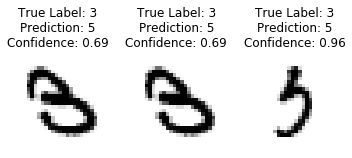

In [18]:
error_indexes = []
for i in range(len(test_pred)):
    if (test_pred_class[i] != y_test_class[i]):
        if(y_test_class[i] == 5 or y_test_class[i] == 3):
            if(test_pred_class[i] == 5 or test_pred_class[i] == 3):
                error_indexes += [i]

j = 1
for i in np.random.choice(error_indexes, size = 3):
    img = X_test[i] 
    img = img.reshape(28, 28)
    
    plt.subplot(1, 3, j)
    j = j + 1
    plt.axis('off')
    plt.imshow(img, cmap=cm.binary, interpolation='None')
    plt.title('True Label: ' + str(y_test_class[i]) \
              + '\n' + 'Prediction: '+ str(test_pred_class[i]) \
              + '\n' + 'Confidence: '+ str(round(test_pred[i][test_pred_class[i]], 2)))
    